# Problem Set 0 - Zane Bayer - CSCI520 - (2/15/2022)

## Reproduction of <a href="https://www.kdnuggets.com/2018/07/basic-image-data-analysis-numpy-opencv-p1.html" taregt="_blank">*Basic Image Analysis Using Numpy and OpenCV-Part 1*</a> by M. Innat

### Importing Image

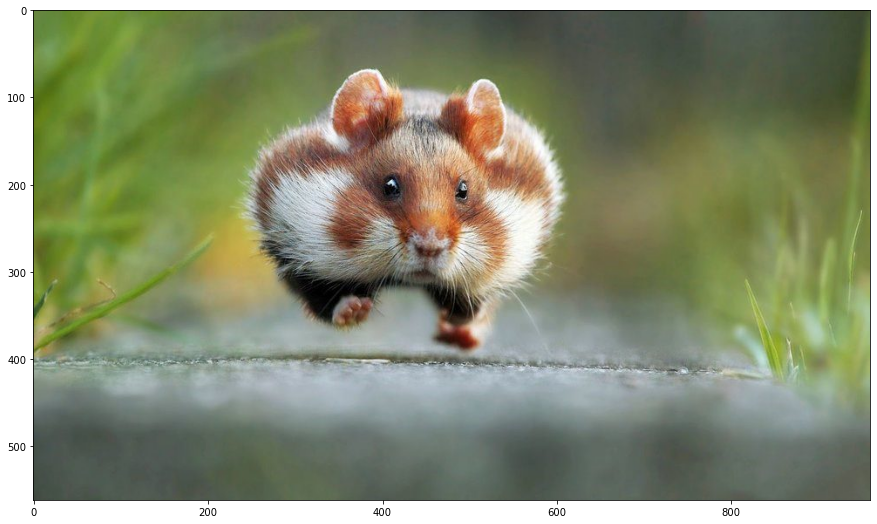

In [13]:
#Importing Image 
#I've modified the 'pic=' line so that the image 
#does not need to be saved locally

import imageio
import matplotlib.pyplot as plt
%matplotlib inline
pic=imageio.imread('https://www.kdnuggets.com/wp-content/uploads/image-fig1.jpg')
plt.figure(figsize=(15,15))

plt.imshow(pic)

### Observe Basic Properties of Image

In [14]:
#Observe Basic Properties of Image

print('Type of the image: ',type(pic))
print()
print('Shape of the image: {}'.format(pic.shape))
print('Image Height {}'.format(pic.shape[0]))
print('Image Width {}'.format(pic.shape[1]))
print('Dimension of Image {}'.format(pic.ndim))

Type of the image:  <class 'imageio.core.util.Array'>

Shape of the image: (562, 960, 3)
Image Height 562
Image Width 960
Dimension of Image 3


In [15]:
print('Image size {}'.format(pic.size))
print('Maximum RGB value in this image {}'.format(pic.max()))
print('Minimum RGB value in this image {}'.format(pic.min()))


Image size 1618560
Maximum RGB value in this image 255
Minimum RGB value in this image 0


In [16]:
pic[100,50]

Array([109, 144,  44], dtype=uint8)

In [17]:
#A specific pixel located at Row: 100, Column: 50
#Each channel's value of it, gradually R,G,B

print('Value of only the R channel {}'.format(pic[100,50,0]))
print('Value of only the G channel {}'.format(pic[100,50,1]))
print('Value of only the B channel {}'.format(pic[100,50,2]))

Value of only the R channel 109
Value of only the G channel 144
Value of only the B channel 44


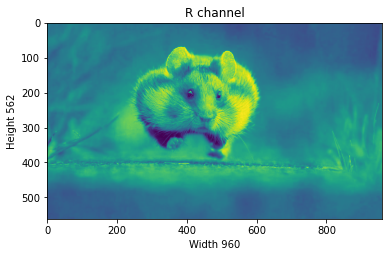

In [18]:
#Looking at the RGB channels separately
plt.title('R channel' )
plt.ylabel('Height {}'.format(pic.shape[0]))
plt.xlabel('Width {}'.format(pic.shape[1]))
plt.imshow(pic[:,:,0])
plt.show()

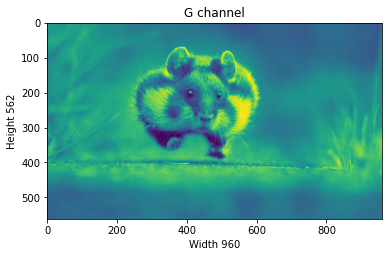

In [19]:
plt.title('G channel' )
plt.ylabel('Height {}'.format(pic.shape[0]))
plt.xlabel('Width {}'.format(pic.shape[1]))
plt.imshow(pic[:,:,1])
plt.show()

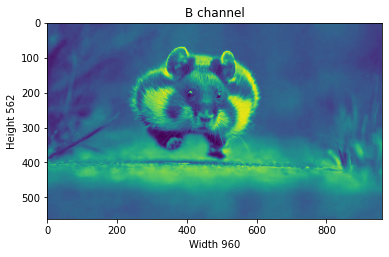

In [20]:
plt.title('B channel' )
plt.ylabel('Height {}'.format(pic.shape[0]))
plt.xlabel('Width {}'.format(pic.shape[1]))
plt.imshow(pic[:,:,2])
plt.show()

### Adjusting RGB Values

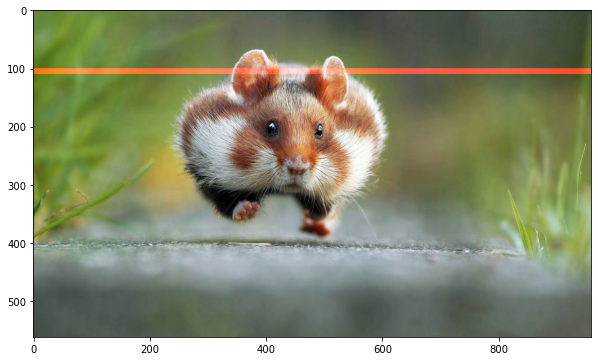

In [21]:
#Adjusting RGB values
#Ive have changed the indices to recreate the images
#as shown and specified in the article rather than the 
#indices of the article's code

pic=imageio.imread('https://www.kdnuggets.com/wp-content/uploads/image-fig1.jpg')
pic[100:110,:,0]=255 #setting these R pixels to full intensity
plt.figure(figsize=(10,10))
plt.imshow(pic)
plt.show()

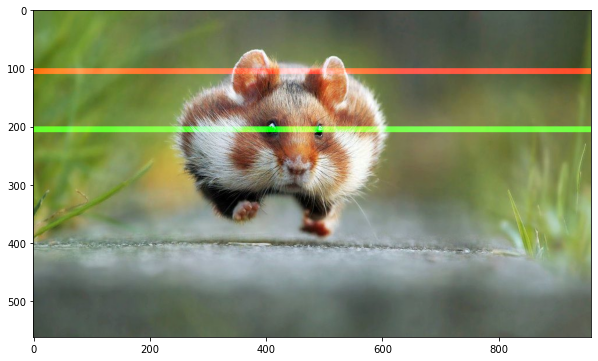

In [22]:
pic[200:210,:,1]=255 #setting these G pixels to full intensity
plt.figure(figsize=(10,10))
plt.imshow(pic)
plt.show()

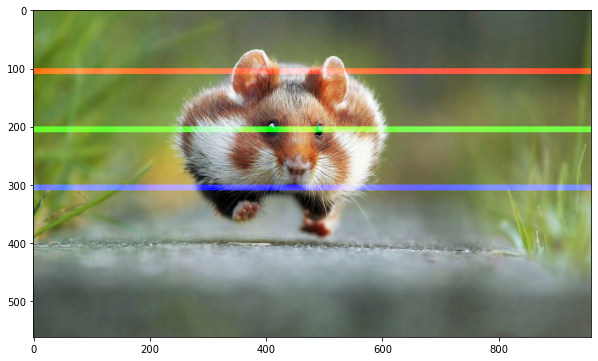

In [23]:
pic[300:310,:,2]=255 #setting these B pixels to full intensity
plt.figure(figsize=(10,10))
plt.imshow(pic)
plt.show()

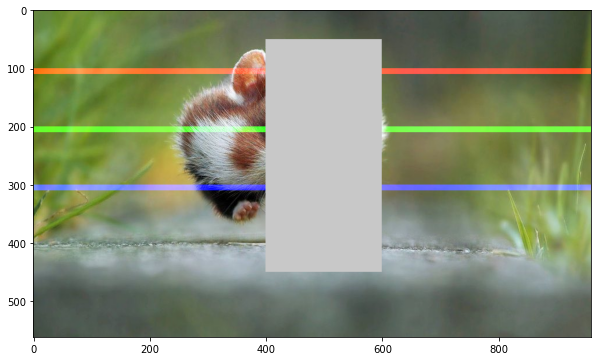

In [24]:
#set value 200 of all channels to those pixels which turns them white
pic[50:450, 400:600,[0,1,2]]=200
plt.figure(figsize=(10,10))
plt.imshow(pic)
plt.show()

### Splitting Layers

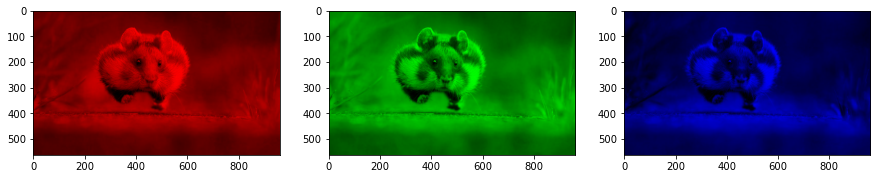

In [25]:
#Splitting Layers

import numpy as np

pic=imageio.imread('https://www.kdnuggets.com/wp-content/uploads/image-fig1.jpg')
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
for c,ax in zip(range(3),ax):
  
  split_img=np.zeros(pic.shape,dtype="uint8")
  split_img[:,:,c]=pic[:,:,c]
  ax.imshow(split_img)

#create 



### Greyscale

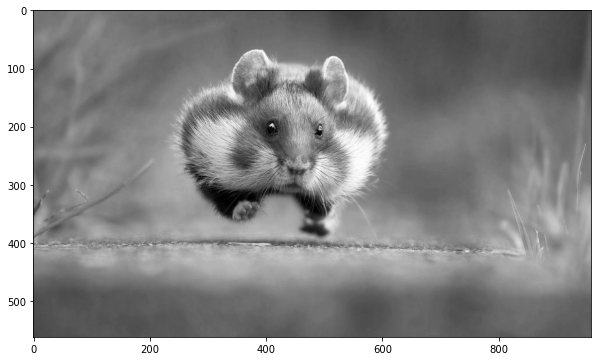

In [26]:
#Greyscale 

#Here the luminosity Y'=0.299R + 0.587G + 0.114B is used

pic=imageio.imread('https://www.kdnuggets.com/wp-content/uploads/image-fig1.jpg')
gray=lambda rgb: np.dot(rgb[...,:3],[0.299,0.587,0.114])
gray=gray(pic)
plt.figure(figsize=(10,10))
plt.imshow(gray,cmap=plt.get_cmap(name='gray'))
plt.show()

Type of the image:  <class 'imageio.core.util.Array'>

Shape of the image: (562, 960)
Image Height 562
Image Width 960
dimension of Image 2

Image size 539520
Maximum RGB value in this image 254.99999999999997
Minimum RGB value in this image 0.0
Random indexes [X,Y]: 129.65


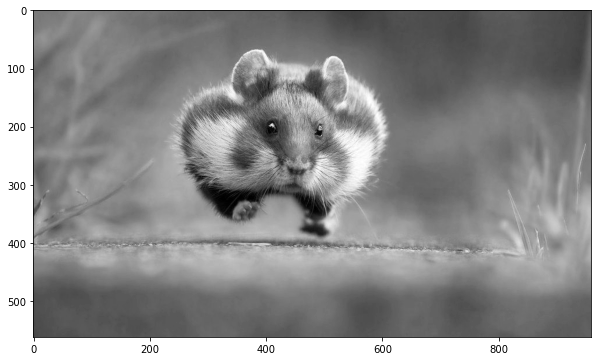

In [27]:
#Here the luminosity is Y'=0.21R + 0.72G + 0.07B

pic=imageio.imread('https://www.kdnuggets.com/wp-content/uploads/image-fig1.jpg')
gray=lambda rgb: np.dot(rgb[...,:3],[0.21,0.72,0.07])
gray=gray(pic)
plt.figure(figsize=(10,10))
plt.imshow(gray,cmap=plt.get_cmap(name='gray'))

#image properties

print('Type of the image: ',type(gray))
print()
print('Shape of the image: {}'.format(gray.shape))
print('Image Height {}'.format(gray.shape[0]))
print('Image Width {}'.format(gray.shape[1]))
print('dimension of Image {}'.format(gray.ndim))
print()
print('Image size {}'.format(gray.size))
print('Maximum RGB value in this image {}'.format(gray.max()))
print('Minimum RGB value in this image {}'.format(gray.min()))
print('Random indexes [X,Y]: {}'.format(gray[100,50]))

## Reproduction of <a href="https://www.kdnuggets.com/2018/10/preprocessing-deep-learning-covariance-matrix-image-whitening.html" taregt="_blank">*Preprocessing for Deep Learning: From covariance matrix to image whitening*</a> by H. Jean

### 1.Background

#### A. Variance and covariance

In [28]:
# A. variance and covariance


#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

A=np.array([[1,3,5],[5,4,1],[3,8,6]])
A

array([[1, 3, 5],
       [5, 4, 1],
       [3, 8, 6]])

In [29]:
np.cov(A,rowvar=False,bias=True)

array([[ 2.66666667,  0.66666667, -2.66666667],
       [ 0.66666667,  4.66666667,  2.33333333],
       [-2.66666667,  2.33333333,  4.66666667]])

In [30]:
#Finding the covariance with dot product

def calculateCovariance(X):
  meanX=np.mean(X,axis=0)
  lenX=X.shape[0]
  X=X-meanX
  covariance=X.T.dot(X)/lenX
  return covariance

In [31]:
calculateCovariance(A)

array([[ 2.66666667,  0.66666667, -2.66666667],
       [ 0.66666667,  4.66666667,  2.33333333],
       [-2.66666667,  2.33333333,  4.66666667]])

#### B. Visualize data and covariance matrices

In [32]:
#B. Visualize data and covariance matrices

def plotDataAndCov(data):
  Acov=np.cov(data,rowvar=False,bias=True)
  print('Covariance matrix:\n',Acov)

  fig,ax=plt.subplots(nrows=1,ncols=2)
  fig.set_size_inches(10,10)

  ax0=plt.subplot(2,2,1)

  #choosing the colors
  cmap=sns.color_palette('GnBu',10)
  sns.heatmap(Acov,cmap=cmap,vmin=0)
  ax1=plt.subplot(2,2,2)

  #data can include the colors
  if data.shape[1]==3:
    c=data[:,2]
  else:
    c="#0A98BE"

  ax1.scatter(data[:,0],data[:,1],c=c,s=40)

  #Remove 
  ax1.spines['right'].set_visible(False)
  ax1.spines['top'].set_visible(False)

  return

#### C. Simulating data

In [33]:
#C. simulating data

#uncorrelated data

np.random.seed(1234)
a1=np.random.normal(2,1,300)
a2=np.random.normal(1,1,300)
A=np.array([a1,a2]).T
A.shape



(300, 2)

In [34]:
A[:10,:]

array([[ 2.47143516,  1.52704645],
       [ 0.80902431,  1.7111124 ],
       [ 3.43270697,  0.78245452],
       [ 1.6873481 ,  3.63779121],
       [ 1.27941127, -0.74213763],
       [ 2.88716294,  0.90556519],
       [ 2.85958841,  2.43118375],
       [ 1.3634765 ,  1.59275845],
       [ 2.01569637,  1.1702969 ],
       [-0.24268495, -0.75170595]])

C:\Users\zbayer\Desktop\WPy64-3950\python-3.9.5.amd64\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zbayer\Desktop\WPy64-3950\python-3.9.5.amd64\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


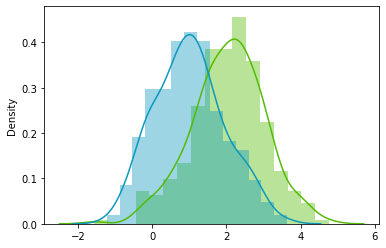

In [35]:
sns.distplot(A[:,0],color="#53BB04")
sns.distplot(A[:,1], color="#0A98BE")
plt.show()



Covariance matrix:
 [[ 0.95171641 -0.0447816 ]
 [-0.0447816   0.87959853]]


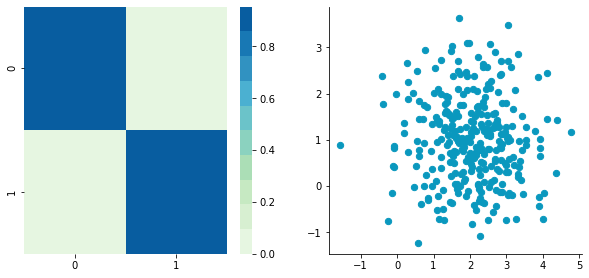

In [36]:
plotDataAndCov(A)
plt.show()


Covariance matrix:
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


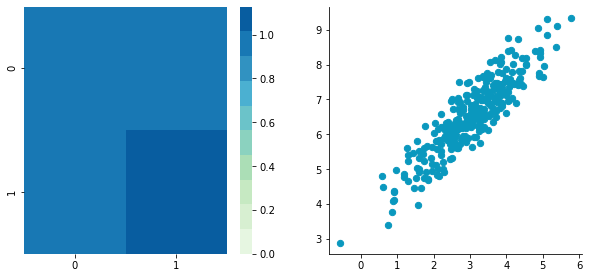

In [37]:
#Correlated data

np.random.seed(1234)
b1=np.random.normal(3,1,300)
b2=b1+np.random.normal(7,1,300)/2
B=np.array([b1,b2]).T
plotDataAndCov(B)
plt.show()


### 2. Preprocessing

#### A. Mean normalization

In [38]:
#A. Mean Normalization

def center(X):
  newX=X-np.mean(X,axis=0)
  return newX


Before:


Covariance matrix:
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


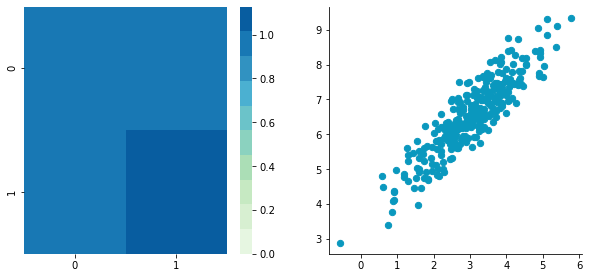

After:


Covariance matrix:
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


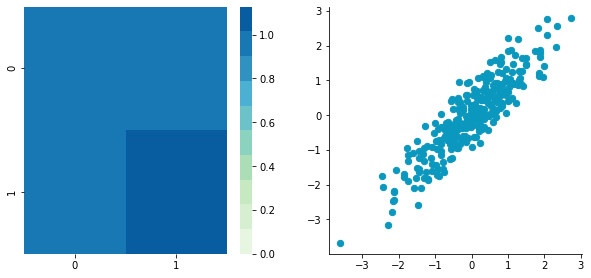

In [39]:
BCenter=center(B)

print('Before:\n\n')

plotDataAndCov(B)
plt.show()


print('After:\n\n')

plotDataAndCov(BCenter)
plt.show()


#### Standardization or normalization

In [40]:
#B. Standardization or normalization

def standardize(X):
  newX=center(X)/np.std(X,axis=0)
  return newX


Covariance matrix:
 [[0.95171641 0.83976242]
 [0.83976242 6.22529922]]


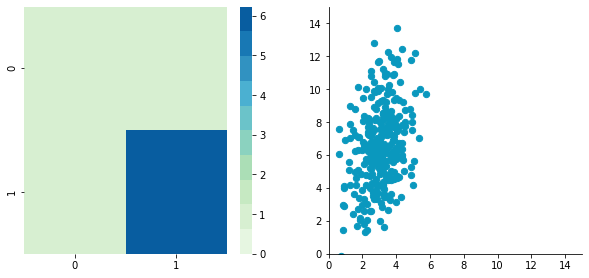

In [41]:
np.random.seed(1234)
c1=np.random.normal(3,1,300)
c2=c1+np.random.normal(7,5,300)/2
C=np.array([c1,c2]).T

plotDataAndCov(C)
plt.xlim(0,15)
plt.ylim(0,15)
plt.show()


Covariance matrix:
 [[1.         0.34500274]
 [0.34500274 1.        ]]


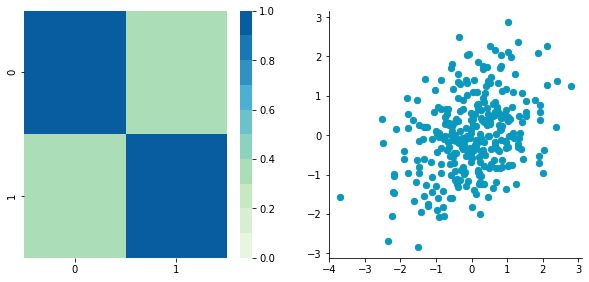

In [42]:
Cstandard=standardize(C)

plotDataAndCov(Cstandard)
plt.show()


#### C. Whitening

Covariance matrix:
 [[0.95171641 0.83976242]
 [0.83976242 6.22529922]]


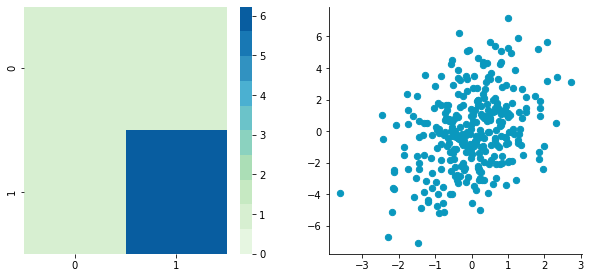

In [43]:
#C. Whitening
#Whitening entails 3 steps: zero-center the data, decorrelate the data, rescale the data

#zero-centering the data

CCentered=center(C)
plotDataAndCov(CCentered)
plt.show()


In [44]:
#Decorrelate
#Decorrelating the data involves 3 steps: find the covariance matrix, find the eigenvectors of this matrix, apply the eigenvector matrix to the data

def decorrelate(X):
  newX=center(X)
  cov=X.T.dot(X)/float(X.shape[0])

  #find eigenvalues
  eVals,eVecs=np.linalg.eig(cov)

  #apply eigenvectors to X
  decorrelated=X.dot(eVecs)
  return decorrelated

  

Before decorrelation
Covariance matrix:
 [[0.95171641 0.83976242]
 [0.83976242 6.22529922]]


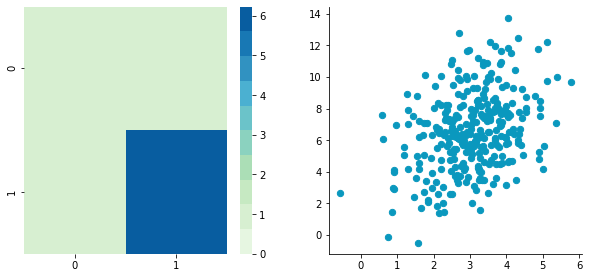

After decorrelation
Covariance matrix:
 [[8.21222171e-01 8.28966525e-17]
 [8.28966525e-17 6.35579346e+00]]


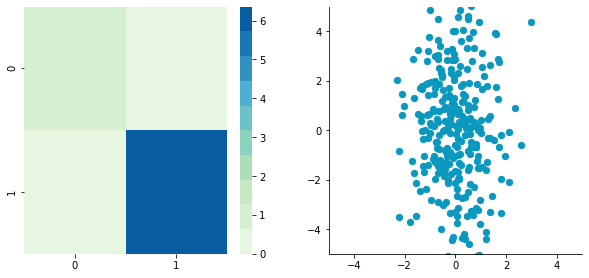

In [45]:
print('Before decorrelation')
plotDataAndCov(C)
plt.show()

print('After decorrelation')
CDecorrelated=decorrelate(CCentered)
plotDataAndCov(CDecorrelated)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()

In [46]:
# Rescale the data

#Rescaling the data is easily done, so we'll jump to putting together the 3 steps
#and creating a data whitening function

def whiten(X):
  newX=center(X)
  cov=X.T.dot(X)/float(X.shape[0])

  #find the eigenvalues and eigenvectors
  eVals,eVecs=np.linalg.eig(cov)

  #apply eigenvectors to covariance matrix
  decorrelated=X.dot(eVecs)

  #Rescale
  whitened=(decorrelated)/np.sqrt(eVals+1e-5)
  
  return whitened

Covariance matrix:
 [[9.99987823e-01 2.51650552e-17]
 [2.51650552e-17 9.99998427e-01]]


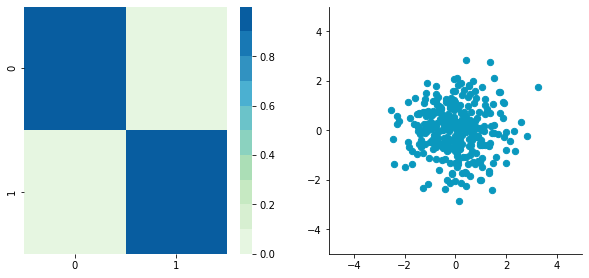

In [47]:
Cwhitened=whiten(CCentered)
plotDataAndCov(Cwhitened)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()

### 3. Image Whitening

#### Loading Data

In [48]:
from keras.datasets import cifar10

(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

xtrain.shape

170508288/170498071 [==============================] - 85s 0us/step


(50000, 32, 32, 3)

In [49]:
X=xtrain[:1000]
print(X.shape)

(1000, 32, 32, 3)


In [50]:
X=X.reshape(X.shape[0],X.shape[1]*X.shape[2]*X.shape[3])
print(X.shape)

(1000, 3072)


In [51]:
def plotImage(X):
  plt.figure(figsize=(1.5,1.5))
  plt.imshow(X.reshape(32,32,3))
  plt.show()

  return

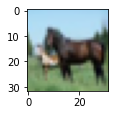

In [52]:
plotImage(X[12,:])

#### Whitening Image Steps

In [53]:
#Whitening image process

#1. Normalize
Xnorm=X/255.
print('X.min()',Xnorm.min())
print('X.max()',Xnorm.max())

X.min() 0.0
X.max() 1.0


In [54]:
#2. subtract the mean

Xnorm.mean(axis=0).shape

(3072,)

In [55]:
Xnorm.mean(axis=0)

array([0.5234    , 0.54323137, 0.5274    , ..., 0.50369804, 0.50011765,
       0.45227451])

In [56]:
Xnorm=Xnorm-Xnorm.mean(axis=0)

In [57]:
Xnorm.mean(axis=0)

array([-5.30575583e-16, -5.98021632e-16, -4.23439062e-16, ...,
       -1.81965554e-16, -2.49800181e-16,  3.98570066e-17])

In [58]:
#Finding covariance matrix
cov=np.cov(Xnorm,rowvar=False)
cov.shape

(3072, 3072)

#### 'The Magic Part'

In [59]:
#finding singular values and vectors of the covariance matrix
U,S,V=np.linalg.svd(cov)
print(U.shape,S.shape)

(3072, 3072) (3072,)


In [60]:
print(np.diag(S))
print('\nshape:',np.diag(S).shape)

[[5.46967832e+01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.02861434e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.24476904e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.20778268e-15
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  3.21171593e-15 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.53626844e-15]]

shape: (3072, 3072)


In [61]:
# Putting the process togther to whiten an image
epsilon=0.1
X_ZCA=U.dot(np.diag(1.0/np.sqrt(S+epsilon))).dot(U.T).dot(Xnorm.T).T

#Rescaling images
X_ZCA_rescaled=(X_ZCA-X_ZCA.min())/(X_ZCA.max()-X_ZCA.min())
print('min:',X_ZCA_rescaled.min())
print('max:',X_ZCA_rescaled.max())


min: 0.0
max: 1.0


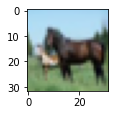

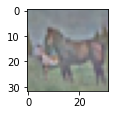

In [62]:
#looking at the effect of the whitening
plotImage(X[12,:])
plotImage(X_ZCA_rescaled[12,:])

## Reproduction of *Make Your Own Neural Network* by T.Rashid 

### Note: I was unable to get this section working properly without having the data stored locally. I've linked to the datasets where relevant. For this section I had the uploaded the data to colab with the 'Files' section to the left. 

### PART 2 - DIY with Python

#### A Very Gentle Start with Python

In [63]:
2*3

6

In [64]:
print('Hello World')

Hello World


In [65]:
#sample error message
x=10
print(x)
print(x+5)

y=x+7
print(y)

print(z)

10
15
17


NameError: name 'z' is not defined

#### Automating Work

In [66]:

list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [67]:
for n in range(10):
  print(n)
  pass
print('done')

0
1
2
3
4
5
6
7
8
9
done


In [68]:
for n in range(10):
  print('The square of',n,'is',n*n)
  pass
print('done')

The square of 0 is 0
The square of 1 is 1
The square of 2 is 4
The square of 3 is 9
The square of 4 is 16
The square of 5 is 25
The square of 6 is 36
The square of 7 is 49
The square of 8 is 64
The square of 9 is 81
done


#### Comments


In [69]:
#The following prints out the cube of 2
print(2**3)

8


#### Functions

In [70]:
#Functions that takes 2 numbers as input and outputs their average
def avg(x,y):
  print('first input is',x)
  print('second input is',y)
  a=(x+y)/2
  print('average is',a)
  return a

In [71]:
avg(2,4)

first input is 2
second input is 4
average is 3.0


3.0

In [72]:
avg(200,301)

first input is 200
second input is 301
average is 250.5


250.5

#### Arrays

In [73]:
import numpy as np

a=np.zeros([3,2])
print(a)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [74]:
a[0,0]=1
a[0,1]=2
a[1,0]=9
a[2,1]=12
print(a)

[[ 1.  2.]
 [ 9.  0.]
 [ 0. 12.]]


In [75]:
print(a[0,1])
v=a[1,0]
print(v)


2.0
9.0


In [76]:
#sample error
a(0,2)

TypeError: 'numpy.ndarray' object is not callable

#### Plotting arrays

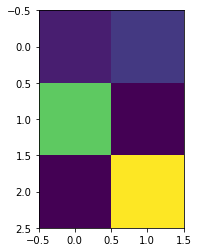

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(a,interpolation='nearest')

#### Objects

In [78]:
#class for a dog object
class Dog:

  #dog can bark()
  def bark(self):
    print('woof!')
    pass

  pass

In [79]:
sizzles=Dog()
sizzles.bark()

woof!


In [80]:
sizzles=Dog()
mutley=Dog()

sizzles.bark()
mutley.bark()

woof!
woof!


In [81]:
class Dog:

  #initialize method with internal data
  def __init__(self,petname,temp):
    self.name=petname
    self.temperature=temp

  #get status
  def status(self):
    print('dog name is',self.name)
    print('dog temperature is',self.temperature)
    pass

  #set temperature
  def setTemperature(self,temp):
    self.temperature=temp
    pass

  #dogs can bark
  def bark(self):
    print('woof!')
    pass

  pass

In [82]:
lassie=Dog('Lassie',37)
lassie.status()

dog name is Lassie
dog temperature is 37


In [83]:
lassie.setTemperature(40)
lassie.status()

dog name is Lassie
dog temperature is 40


#### Neural Network with Python



In [84]:
# neural network class definition
import numpy as np
import scipy as sp

class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        
        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: sp.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [85]:
#Sample network with 3 nodes in each layer

input_nodes=3
hidden_nodes=3
output_nodes=3

#learning rate is 0.3
learning_rate=0.3

#create instance of nn
n=neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

In [86]:
n.query([1.0,0.5,-1.5])

array([[0.40572906],
       [0.43155437],
       [0.590608  ]])

#### The MNIST Dataset of Handwritten Numbers

Data for the following cell is found at https://raw.githubusercontent.com/makeyourownneuralnetwork/makeyourownneuralnetwork/master/mnist_dataset/mnist_train_100.csv

In [88]:
#reading in a subset of the MNIST dataset
#I have read the data in from the url so that the file 
#does not need to be stored locally to work
import pandas as pd

training_data_file = open("mnist_train_100.csv", 'r')
data_list = training_data_file.readlines()
training_data_file.close()

#url = 'https://raw.githubusercontent.com/makeyourownneuralnetwork/makeyourownneuralnetwork/master/mnist_dataset/mnist_train_100.csv'
#df=pd.read_csv(url,header=None)



In [89]:
len(data_list)

100

In [90]:
data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

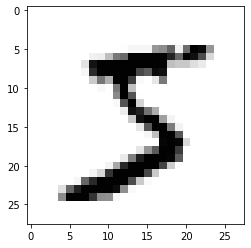

In [91]:
allVals=data_list[0].split(',')
imageArray=np.asfarray(allVals[1:]).reshape((28,28))
plt.imshow(imageArray,cmap='Greys',interpolation='None')

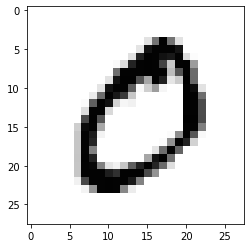

In [92]:
allVals=data_list[1].split(',')
imageArray=np.asfarray(allVals[1:]).reshape((28,28))
plt.imshow(imageArray,cmap='Greys',interpolation='None')

In [93]:
#preparing MNIST data
scaledInput=imageArray/(255.0)*0.99+0.01
scaledInput


array([[0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      ],
       [0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      ],
       [0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01  

In [94]:
#output node is 10 (example)
onodes=10
targets=np.zeros(onodes)+0.01
targets[int(allVals[0])]=0.99
print(targets)

[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


#### Training the Network

In [95]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# learning rate
learning_rate = 0.3

# create instance of neural network
nn = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

the data for the following cell can be found at: https://raw.githubusercontent.com/makeyourownneuralnetwork/makeyourownneuralnetwork/master/mnist_dataset/mnist_test_10.csv

In [96]:
training_data_file = open("mnist_train_100.csv", 'r')
data_list = training_data_file.readlines()
training_data_file.close()
epochs=5

for i in range(epochs):
  for record in data_list:
    #get record values
    allVals=record.split(',')
    #scale and shift inputs
    inputs=(np.asfarray(allVals[1:])/255.0*0.99)+0.01
    #create target output values
    targets=np.zeros(output_nodes)+0.01
    #allVals[0] is the label for this record
    targets[int(allVals[0])]=0.99
    nn.train(inputs,targets)

#### Testing the neural network

In [98]:
#loading test data

test_data_file=open('mnist_test_10.csv')
test_data=test_data_file.readlines()
test_data_file.close()

In [99]:
#preparing data in the same manner as the training data
allVals=test_data[0].split(',')
print(allVals[0])

7


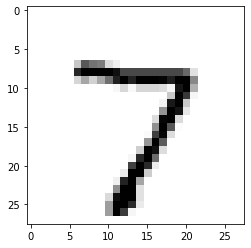

In [100]:
imageArray=np.asfarray(allVals[1:]).reshape((28,28))
plt.imshow(imageArray,cmap='Greys',interpolation='None')

In [101]:
nn.query((np.asfarray(allVals[1:])/255.0*0.99)+0.01)

array([[0.06762616],
       [0.01034486],
       [0.03860342],
       [0.02114482],
       [0.01311426],
       [0.03954186],
       [0.00377849],
       [0.908804  ],
       [0.03754885],
       [0.0155072 ]])

In [102]:
from numpy.lib.type_check import asfarray
#going through all samples in test set

scorecard=[]

for record in test_data:
  #split by comma
  allVals=record.split(',')
  correctLabel=int(allVals[0])
  print(correctLabel,'correct label')
  #scale and shift inputs
  inputs=(np.asfarray(allVals[1:])/255.0*0.99)+0.01
  #query nn
  outputs=nn.query(inputs)
  #get index of largest value
  label=np.argmax(outputs)
  print(label, 'networks answer')
  #append correct or incorrect
  if(label==correctLabel):
    scorecard.append(1)
  else:
    scorecard.append(0)
    pass

7 correct label
7 networks answer
2 correct label
2 networks answer
1 correct label
1 networks answer
0 correct label
0 networks answer
4 correct label
4 networks answer
1 correct label
1 networks answer
4 correct label
4 networks answer
9 correct label
4 networks answer
5 correct label
4 networks answer
9 correct label
7 networks answer


In [103]:
print(scorecard)

[1, 1, 1, 1, 1, 1, 1, 0, 0, 0]


In [104]:
#calculate score of nn
scorecardArray=np.asarray(scorecard)
print('performance=', scorecardArray.sum()/scorecardArray.size)

performance= 0.7


#### Testing on all mnist data

<a href='https://pjreddie.com/media/files/mnist_train.csv' taregt="_blank">Training file</a>



<a href='https://pjreddie.com/media/files/mnist_test.csv' taregt="_blank" taregt="_blank">Test file</a>

In [105]:
#training data
training_data_file = open("mnist_train.csv", 'r')
data_list = training_data_file.readlines()
training_data_file.close()

#loading test data
test_data_file=open('mnist_test.csv')
test_data=test_data_file.readlines()
test_data_file.close()

In [106]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# learning rate
learning_rate = 0.3

# create instance of neural network
nn = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [107]:
#training nn

epochs=1

for i in range(epochs):
  for record in data_list:
    #get record values
    allVals=record.split(',')
    #scale and shift inputs
    inputs=(np.asfarray(allVals[1:])/255.0*0.99)+0.01
    #create target output values
    targets=np.zeros(output_nodes)+0.01
    #allVals[0] is the label for this record
    targets[int(allVals[0])]=0.99
    nn.train(inputs,targets)

In [108]:
#testing
scorecard=[]

for record in test_data:
  #split by comma
  allVals=record.split(',')
  correctLabel=int(allVals[0])
  #print(correctLabel,'correct label')
  #scale and shift inputs
  inputs=(np.asfarray(allVals[1:])/255.0*0.99)+0.01
  #query nn
  outputs=nn.query(inputs)
  #get index of largest value
  label=np.argmax(outputs)
  #print(label, 'networks answer')
  #append correct or incorrect
  if(label==correctLabel):
    scorecard.append(1)
  else:
    scorecard.append(0)
    pass

In [109]:
#calculate score of nn
scorecardArray=np.asarray(scorecard)
print('performance=', scorecardArray.sum()/scorecardArray.size)

performance= 0.947


#### Some improvements: tweaking the learning rate



In [110]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learningRates=np.linspace(0.1,.9,6)
lrScores=[]
epochs=1
for j in range(len(learningRates)):
  earning_rate = learningRates[j]
  nn = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)
  for i in range(epochs):
    for record in data_list:
      #get record values
      allVals=record.split(',')
      #scale and shift inputs
      inputs=(np.asfarray(allVals[1:])/255.0*0.99)+0.01
      #create target output values
      targets=np.zeros(output_nodes)+0.01
      #allVals[0] is the label for this record
      targets[int(allVals[0])]=0.99
      nn.train(inputs,targets)
    
  scorecard=[]

  for record in test_data:
    #split by comma
    allVals=record.split(',')
    correctLabel=int(allVals[0])
    #print(correctLabel,'correct label')
    #scale and shift inputs
    inputs=(np.asfarray(allVals[1:])/255.0*0.99)+0.01
    #query nn
    outputs=nn.query(inputs)
    #get index of largest value
    label=np.argmax(outputs)
    #print(label, 'networks answer')
    #append correct or incorrect
    if(label==correctLabel):
      scorecard.append(1)
    else:
      scorecard.append(0)
    
  scorecardArray=np.asarray(scorecard)
  lrScores.append(scorecardArray.sum()/scorecardArray.size)
  print('performance=', scorecardArray.sum()/scorecardArray.size)

performance= 0.9465
performance= 0.9476
performance= 0.9458
performance= 0.948
performance= 0.9373
performance= 0.9464


Plot of learning rate vs performance 

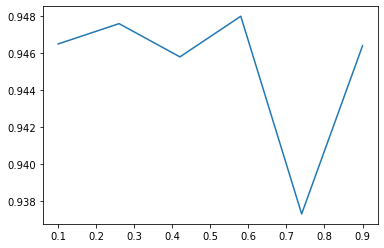

In [111]:
plt.plot(learningRates,lrScores)

#### Some improvements: Doing multiple runs

In [113]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
numEpochs=[1,2,3,8,13,21]
epochScores=[]

for j in range(len(numEpochs)):
  epochs=numEpochs[j]
  for i in range(epochs):
    for record in data_list:
      #get record values
      allVals=record.split(',')
      #scale and shift inputs
      inputs=(np.asfarray(allVals[1:])/255.0*0.99)+0.01
      #create target output values
      targets=np.zeros(output_nodes)+0.01
      #allVals[0] is the label for this record
      targets[int(allVals[0])]=0.99
      nn.train(inputs,targets)
    
  scorecard=[]

  for record in test_data:
    #split by comma
    allVals=record.split(',')
    correctLabel=int(allVals[0])
    #print(correctLabel,'correct label')
    #scale and shift inputs
    inputs=(np.asfarray(allVals[1:])/255.0*0.99)+0.01
    #query nn
    outputs=nn.query(inputs)
    #get index of largest value
    label=np.argmax(outputs)
    #print(label, 'networks answer')
    #append correct or incorrect
    if(label==correctLabel):
      scorecard.append(1)
    else:
      scorecard.append(0)
    
  scorecardArray=np.asarray(scorecard)
  epochScores.append(scorecardArray.sum()/scorecardArray.size)
  print('performance=', scorecardArray.sum()/scorecardArray.size)

performance= 0.9507
performance= 0.9406
performance= 0.9455
performance= 0.9417
performance= 0.9422
performance= 0.9369


number of epochs vs performance

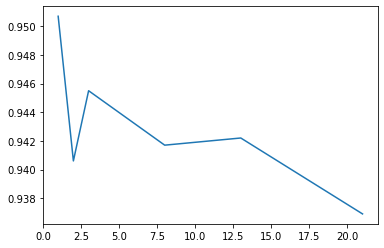

In [114]:
plt.plot(numEpochs,epochScores)

#### Change network shape



In [116]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
numhidden=[1,5,50,100,200,400]
layerScore=[]

for j in range(len(numhidden)):
  hidden_nodes = numhidden[j]
  nn = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)
  for i in range(epochs):
    for record in data_list:
      #get record values
      allVals=record.split(',')
      #scale and shift inputs
      inputs=(np.asfarray(allVals[1:])/255.0*0.99)+0.01
      #create target output values
      targets=np.zeros(output_nodes)+0.01
      #allVals[0] is the label for this record
      targets[int(allVals[0])]=0.99
      nn.train(inputs,targets)
    
  scorecard=[]

  for record in test_data:
    #split by comma
    allVals=record.split(',')
    correctLabel=int(allVals[0])
    #print(correctLabel,'correct label')
    #scale and shift inputs
    inputs=(np.asfarray(allVals[1:])/255.0*0.99)+0.01
    #query nn
    outputs=nn.query(inputs)
    #get index of largest value
    label=np.argmax(outputs)
    #print(label, 'networks answer')
    #append correct or incorrect
    if(label==correctLabel):
      scorecard.append(1)
    else:
      scorecard.append(0)
    
  scorecardArray=np.asarray(scorecard)
  layerScore.append(scorecardArray.sum()/scorecardArray.size)
  print('performance=', scorecardArray.sum()/scorecardArray.size)

performance= 0.0958
performance= 0.8046
performance= 0.9397
performance= 0.9435
performance= 0.9529
performance= 0.9597


Number of hidden layer nodes vs performance

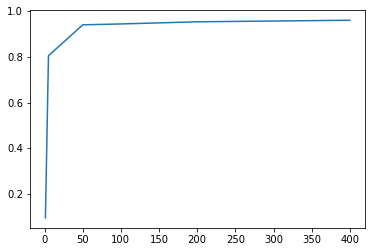

In [117]:
plt.plot(numhidden,layerScore)

### Part 3 - More fun

#### Your own handwriting

images can be found at <a href='https://github.com/makeyourownneuralnetwork/makeyourownneuralnetwork/tree/master/my_own_images' taregt="_blank">This url</a>



In [146]:
# our own image test data set
import glob
import imageio
ownDataset = []

# load the png image data as test data set
for image_file_name in glob.glob('2828_my_own_?.png'):
    
    # use the filename to set the correct label
    label = int(image_file_name[-5:-4])
    
    # load image data from png files into an array
    print ("loading ... ", image_file_name)
    img_array = imageio.imread(image_file_name, as_gray=True)
    
    # reshape from 28x28 to list of 784 values, invert values
    img_data  = 255.0 - img_array.reshape(784)
    
    # then scale data to range from 0.01 to 1.0
    img_data = (img_data / 255.0 * 0.99) + 0.01
    print(np.min(img_data))
    print(np.max(img_data))
    
    # append label and image data  to test data set
    record = np.append(label,img_data)
    ownDataset.append(record)
    
    pass

loading ...  2828_my_own_2.png
0.01
1.0
loading ...  2828_my_own_3.png
0.01
1.0
loading ...  2828_my_own_4.png
0.01
0.93011767
loading ...  2828_my_own_5.png
0.01
0.86800003
loading ...  2828_my_own_6.png
0.01
1.0


In [147]:
len(ownDataset)

5

In [148]:

input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# learning rate
learning_rate = 0.3

# create instance of neural network
nn = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

[[0.62495023]
 [0.53473243]
 [0.47670479]
 [0.62563415]
 [0.58860549]
 [0.3843056 ]
 [0.41169891]
 [0.41915645]
 [0.59496481]
 [0.40248607]]


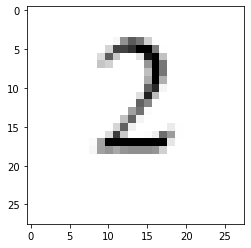

In [149]:
#Querying through with each image 

print(nn.query((np.asfarray(ownDataset[0][1:]))))
plt.imshow(np.asfarray(ownDataset[0][1:]).reshape(28,28),cmap='Greys',interpolation='None')

[[0.63808493]
 [0.51774559]
 [0.46606332]
 [0.617458  ]
 [0.59485523]
 [0.38139093]
 [0.43014744]
 [0.41854761]
 [0.6044599 ]
 [0.41136006]]


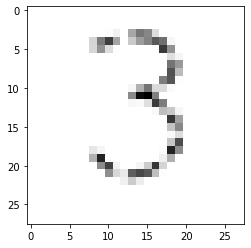

In [150]:
print(nn.query((np.asfarray(ownDataset[1][1:]))))
plt.imshow(np.asfarray(ownDataset[1][1:]).reshape(28,28),cmap='Greys',interpolation='None')

[[0.63270713]
 [0.53892189]
 [0.47497806]
 [0.62189723]
 [0.60079455]
 [0.4100182 ]
 [0.41104872]
 [0.42716408]
 [0.60010514]
 [0.39549265]]


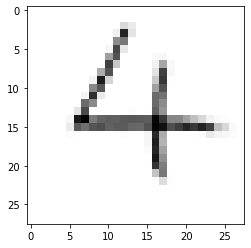

In [151]:
print(nn.query((np.asfarray(ownDataset[2][1:]))))
plt.imshow(np.asfarray(ownDataset[2][1:]).reshape(28,28),cmap='Greys',interpolation='None')

[[0.63814941]
 [0.54399983]
 [0.47157268]
 [0.6143031 ]
 [0.59622388]
 [0.40268792]
 [0.41477045]
 [0.42905709]
 [0.60538494]
 [0.40848667]]


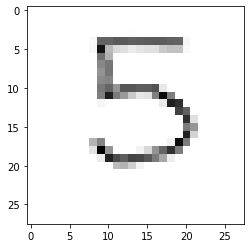

In [152]:
print(nn.query((np.asfarray(ownDataset[3][1:]))))
plt.imshow(np.asfarray(ownDataset[3][1:]).reshape(28,28),cmap='Greys',interpolation='None')

[[0.61926585]
 [0.52457889]
 [0.47245288]
 [0.622114  ]
 [0.58984545]
 [0.39635655]
 [0.42358038]
 [0.41628673]
 [0.58777635]
 [0.42109315]]


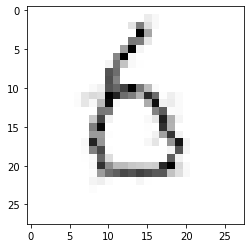

In [153]:
print(nn.query((np.asfarray(ownDataset[4][1:]))))
plt.imshow(np.asfarray(ownDataset[4][1:]).reshape(28,28),cmap='Greys',interpolation='None')

#### Inside mind of a neural network: including 'backquery' function



In [154]:
# neural network class definition
import numpy as np
import scipy as sp

class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        
        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: sp.special.expit(x)
        self.inverse_activation_function=lambda x: sp.special.logit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

   
    def backquery(self, targets_list):
      #function to get image from nn by supplying with a target list
        # transpose the targets list to a vertical array
        final_outputs = np.array(targets_list, ndmin=2).T
        
        # calculate the signal into the final output layer
        final_inputs = self.inverse_activation_function(final_outputs)

        # calculate the signal out of the hidden layer
        hidden_outputs = np.dot(self.who.T, final_inputs)
        # scale them back to 0.01 to .99
        hidden_outputs -= np.min(hidden_outputs)
        hidden_outputs /= np.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01
        
        # calculate the signal into the hidden layer
        hidden_inputs = self.inverse_activation_function(hidden_outputs)
        
        # calculate the signal out of the input layer
        inputs = np.dot(self.wih.T, hidden_inputs)
        # scale them back to 0.01 to .99
        inputs -= np.min(inputs)
        inputs /= np.max(inputs)
        inputs *= 0.98
        inputs += 0.01
        
        return inputs
    
    

In [155]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# learning rate
learning_rate = 0.3

# create instance of neural network
nn = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [156]:
#training nn

epochs=1

for i in range(epochs):
  for record in data_list:
    #get record values
    allVals=record.split(',')
    #scale and shift inputs
    inputs=(np.asfarray(allVals[1:])/255.0*0.99)+0.01
    #create target output values
    targets=np.zeros(output_nodes)+0.01
    #allVals[0] is the label for this record
    targets[int(allVals[0])]=0.99
    nn.train(inputs,targets)

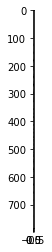

In [157]:
im=nn.backquery([0.99,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01])
plt.imshow(im,cmap='Greys',interpolation='None')

#### Creating new training data: rotations

In [158]:
#image rotated counter-clockwise by 10 degrees
inputPlus10=sp.ndimage.interpolation.rotate(scaledInput.reshape(28,28),10,cval=0.01,reshape=False)
#rotated clockwise by 10 degrees
inputminus10=sp.ndimage.interpolation.rotate(scaledInput.reshape(28,28),-10,cval=0.01,reshape=False)

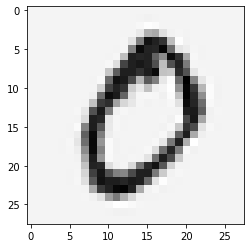

In [159]:
plt.imshow(inputPlus10,cmap='Greys',interpolation='None')

Training with rotated images

In [160]:
epochs=1

for i in range(epochs):
    for record in data_list:
      #get record values
      allVals=record.split(',')
      #scale and shift inputs
      inputs=(np.asfarray(allVals[1:])/255.0*0.99)+0.01
      #create target output values
      targets=np.zeros(output_nodes)+0.01
      #allVals[0] is the label for this record
      targets[int(allVals[0])]=0.99
      nn.train(inputs,targets)

      inputs_plusx_img = sp.ndimage.interpolation.rotate(inputs.reshape(28,28), 10, cval=0.01, order=1, reshape=False)
      nn.train(inputs_plusx_img.reshape(784), targets)
      # rotated clockwise by x degrees
      inputs_minusx_img = sp.ndimage.interpolation.rotate(inputs.reshape(28,28), -10, cval=0.01, order=1, reshape=False)
      nn.train(inputs_minusx_img.reshape(784), targets)
    
scorecard=[]

for record in test_data:
    #split by comma
    allVals=record.split(',')
    correctLabel=int(allVals[0])
    #print(correctLabel,'correct label')
    #scale and shift inputs
    inputs=(np.asfarray(allVals[1:])/255.0*0.99)+0.01
    #query nn
    outputs=nn.query(inputs)
    #get index of largest value
    label=np.argmax(outputs)
    #print(label, 'networks answer')
    #append correct or incorrect
    if(label==correctLabel):
      scorecard.append(1)
    else:
      scorecard.append(0)

In [161]:
#calculate score of nn
scorecardArray=np.asarray(scorecard)
print('performance=', scorecardArray.sum()/scorecardArray.size)

performance= 0.9362


## Reproduction of <a href="https://www.kdnuggets.com/2018/10/preprocessing-deep-learning-covariance-matrix-image-whitening.html" taregt="_blank">*Basic classification: Classify images of clothing*</a>

### Import the Fashion MNIST dataset

In [162]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.7.0


In [163]:
fashionMNIST=tf.keras.datasets.fashion_mnist
(trainImages,trainLabels),(testImages,testLabels)=fashionMNIST.load_data()


4431872/4422102 [==============================] - 0s 0us/step


In [164]:
classNames=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

### Explore the data


In [165]:
trainImages.shape

(60000, 28, 28)

In [166]:
len(trainLabels)

60000

In [167]:
trainLabels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [168]:
testImages.shape

(10000, 28, 28)

In [169]:
len(testLabels)

10000

### Preprocess the data

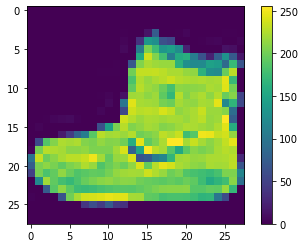

In [170]:
plt.figure()
plt.imshow(trainImages[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [171]:
trainImages=trainImages/255.0
testImages=testImages/255.0


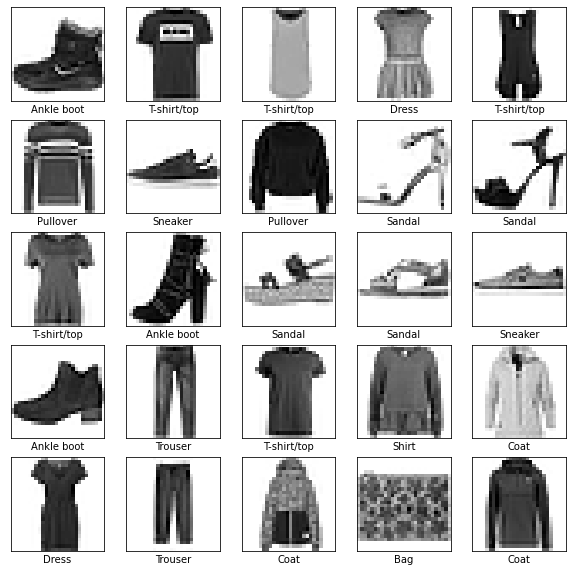

In [172]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(trainImages[i],cmap=plt.cm.binary)
  plt.xlabel(classNames[trainLabels[i]])
plt.show()

### Build the model

In [173]:
model= tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_shape=(28,28)),
                            tf.keras.layers.Dense(128,activation='relu'),
                            tf.keras.layers.Dense(10)
])

### Compile the model


In [174]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])


### Train the model

In [175]:
model.fit(trainImages,trainLabels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5056 - accuracy: 0.8217
Epoch 2/10
1875/1875 [==============================] - 2s 990us/step - loss: 0.3807 - accuracy: 0.8623
Epoch 3/10
1875/1875 [==============================] - 2s 987us/step - loss: 0.3420 - accuracy: 0.8759
Epoch 4/10
1875/1875 [==============================] - 2s 980us/step - loss: 0.3177 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 2s 953us/step - loss: 0.3003 - accuracy: 0.8896
Epoch 6/10
1875/1875 [==============================] - 2s 921us/step - loss: 0.2844 - accuracy: 0.8940
Epoch 7/10
1875/1875 [==============================] - 2s 956us/step - loss: 0.2727 - accuracy: 0.8995
Epoch 8/10
1875/1875 [==============================] - 2s 948us/step - loss: 0.2634 - accuracy: 0.9028
Epoch 9/10
1875/1875 [==============================] - 2s 997us/step - loss: 0.2512 - accuracy: 0.9060
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/st

### Evaluate accuracy

In [176]:
testLoss,testAcc=model.evaluate(testImages,testLabels,verbose=2)
print('\nTest accuracy:',testAcc)

313/313 - 0s - loss: 0.3398 - accuracy: 0.8807 - 350ms/epoch - 1ms/step

Test accuracy: 0.8806999921798706


### Make predictions

In [177]:
probabilityModel=tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [178]:
preds=probabilityModel.predict(testImages)

In [179]:
preds[0]

array([1.1661371e-07, 1.1344758e-11, 2.4261476e-07, 3.3103709e-09,
       4.2948216e-08, 4.8164576e-02, 1.6241190e-08, 2.2422178e-02,
       4.7952358e-07, 9.2941242e-01], dtype=float32)

In [180]:
np.argmax(preds[0])

9

In [181]:
def plotImage(i,predArray,trueLabel,img):
  trueLabel,img=trueLabel[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img,cmap=plt.cm.binary)

  predLabel=np.argmax(predArray)
  if predLabel==trueLabel:
    color='blue'
  else:
    color='red'

  plt.xlabel('{} {:2.0f}% ({})'.format(classNames[predLabel],
                                       100*np.max(predArray),
                                       classNames[trueLabel],
                                       color=color))
  return

def plotValueArray(i,predArray,trueLabel):
    trueLabel=trueLabel[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisPlot=plt.bar(range(10),predArray,color='#777777')
    plt.ylim([0,1])
    predLabel=np.argmax(predArray)

    thisPlot[predLabel].set_color('red')
    thisPlot[trueLabel].set_color('blue')

    return

### Verify predictions

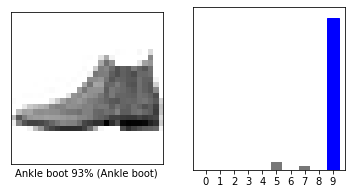

In [182]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plotImage(i,preds[i],testLabels,testImages)
plt.subplot(1,2,2)
plotValueArray(i,preds[i],testLabels)
plt.show()

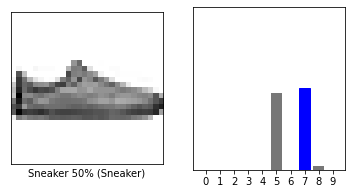

In [183]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plotImage(i,preds[i],testLabels,testImages)
plt.subplot(1,2,2)
plotValueArray(i,preds[i],testLabels)
plt.show()

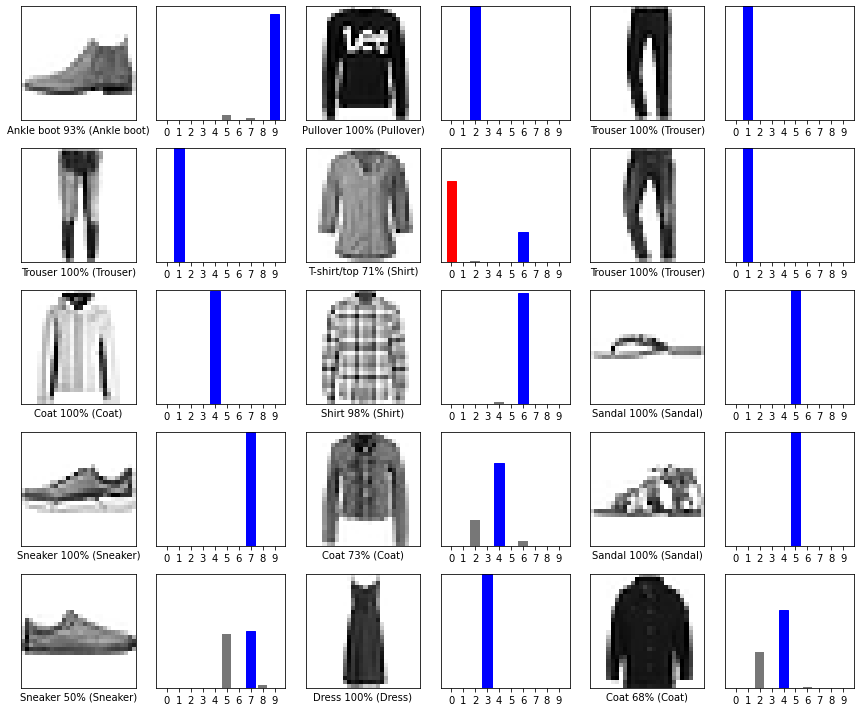

In [184]:
numRows=5
numCols=3
numImages=numRows*numCols
plt.figure(figsize=(2*2*numCols,2*numRows))
for i in range(numImages):
  plt.subplot(numRows,2*numCols,2*i+1)
  plotImage(i,preds[i],testLabels,testImages)
  plt.subplot(numRows,2*numCols,2*i+2)
  plotValueArray(i,preds[i],testLabels)
plt.tight_layout()
plt.show()

### Use the trained model

In [185]:
img=testImages[1]
print(img.shape)

(28, 28)


In [186]:
img=(np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [187]:
predsSingle=probabilityModel.predict(img)

print(predsSingle)

[[8.5249012e-05 1.0541267e-11 9.9938893e-01 9.8374828e-09 1.8195962e-04
  3.7396683e-12 3.4382395e-04 2.3703051e-12 1.4561209e-10 1.8229130e-16]]


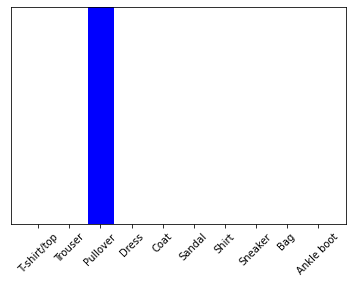

In [188]:
plotValueArray(1,predsSingle[0],testLabels)
_=plt.xticks(range(10),classNames,rotation=45)
plt.show()

In [189]:
np.argmax(predsSingle[0])

2